# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"
query_url = f"{url}&units={units}&appid={weather_api_key}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | arno
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | guiyang
Processing Record 6 of Set 1 | gadzhiyevo
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | pachino
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | la passe
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 16 of Set 1 | ghanzi
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | beledweyne
Processing Record 21 of Set 1 | bilibino
Processin

Processing Record 42 of Set 4 | natal
Processing Record 43 of Set 4 | itoman
Processing Record 44 of Set 4 | kavieng
Processing Record 45 of Set 4 | fuerte olimpo
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | superior
Processing Record 49 of Set 4 | alice springs
Processing Record 0 of Set 5 | pacocha
Processing Record 1 of Set 5 | dambai
City not found. Skipping...
Processing Record 2 of Set 5 | kidal
Processing Record 3 of Set 5 | marvdasht
City not found. Skipping...
Processing Record 4 of Set 5 | gonzalez
Processing Record 5 of Set 5 | thongwa
Processing Record 6 of Set 5 | avarua
Processing Record 7 of Set 5 | badger
Processing Record 8 of Set 5 | yingkou
Processing Record 9 of Set 5 | yuzhno-kurilsk
Processing Record 10 of Set 5 | aasiaat
Processing Record 11 of Set 5 | aras-asan
Processing Record 12 of Set 5 | thinadhoo
Processing Record 13 of Set 5 | palapag
Processing Record 14 of Set 5 | st. john's
Pro

City not found. Skipping...
Processing Record 34 of Set 8 | obock
Processing Record 35 of Set 8 | lompoc
Processing Record 36 of Set 8 | deir ez-zor
Processing Record 37 of Set 8 | santana
Processing Record 38 of Set 8 | richards bay
Processing Record 39 of Set 8 | polovinnoye
Processing Record 40 of Set 8 | nema
Processing Record 41 of Set 8 | kharan
Processing Record 42 of Set 8 | lindi
Processing Record 43 of Set 8 | brak
Processing Record 44 of Set 8 | taroudant
Processing Record 45 of Set 8 | arraial do cabo
Processing Record 46 of Set 8 | lazaro cardenas
Processing Record 47 of Set 8 | copiapo
Processing Record 48 of Set 8 | berezovyy
Processing Record 49 of Set 8 | fort bragg
Processing Record 0 of Set 9 | alampur
Processing Record 1 of Set 9 | piton saint-leu
Processing Record 2 of Set 9 | lorengau
Processing Record 3 of Set 9 | broken hill
Processing Record 4 of Set 9 | shakawe
Processing Record 5 of Set 9 | nar'yan-mar
Processing Record 6 of Set 9 | khandyga
Processing Record

Processing Record 25 of Set 12 | kijang
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,21.69,93,75,2.06,US,1704183405
1,arno,60.1167,18.6333,-7.34,74,100,6.95,SE,1704183405
2,edinburgh of the seven seas,-37.0676,-12.3116,16.54,88,100,0.77,SH,1704183405
3,albany,42.6001,-73.9662,-2.55,77,3,1.79,US,1704183128
4,guiyang,26.5833,106.7167,11.27,71,100,5.00,CN,1704183405


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.69,93,75,2.06,US,1704183405
1,arno,60.1167,18.6333,-7.34,74,100,6.95,SE,1704183405
2,edinburgh of the seven seas,-37.0676,-12.3116,16.54,88,100,0.77,SH,1704183405
3,albany,42.6001,-73.9662,-2.55,77,3,1.79,US,1704183128
4,guiyang,26.5833,106.7167,11.27,71,100,5.00,CN,1704183405


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

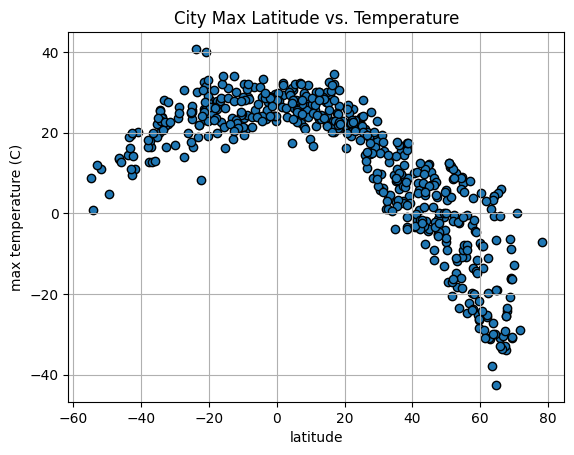

In [8]:
# Build scatter plot for latitude vs. temperature
x_val = city_data_df["Lat"]
y_val = city_data_df["Max Temp"]
plt.scatter(x_val, y_val, edgecolor="black")
plt.xlabel("latitude")
plt.ylabel("max temperature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

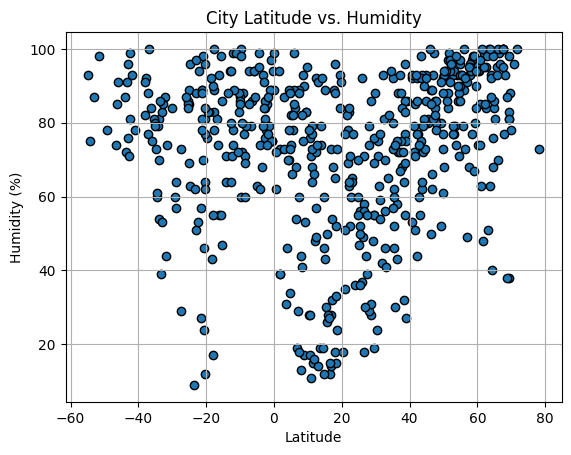

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

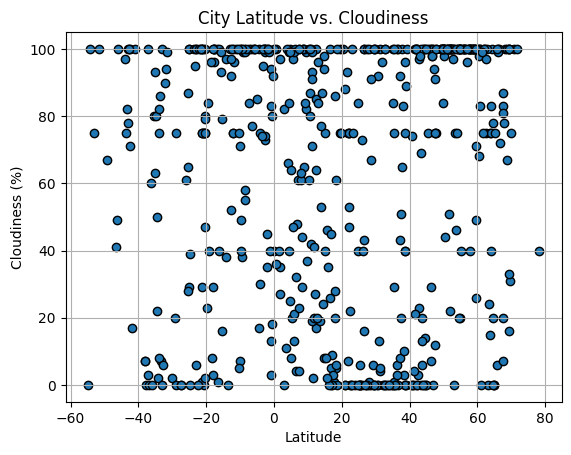

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

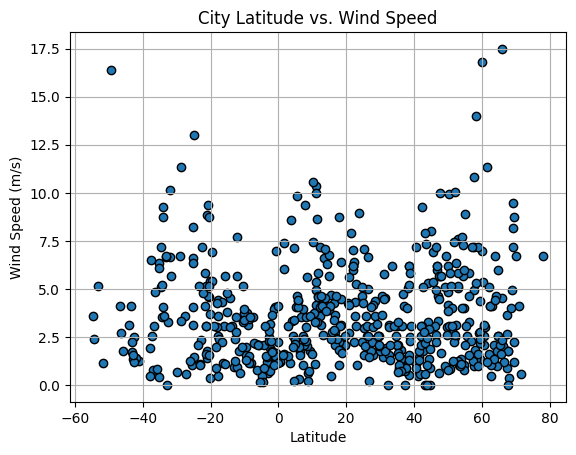

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.69,93,75,2.06,US,1704183405
1,arno,60.1167,18.6333,-7.34,74,100,6.95,SE,1704183405
3,albany,42.6001,-73.9662,-2.55,77,3,1.79,US,1704183128
4,guiyang,26.5833,106.7167,11.27,71,100,5.00,CN,1704183405
5,gadzhiyevo,69.2551,33.3362,-15.99,81,100,9.48,RU,1704183405


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,16.54,88,100,0.77,SH,1704183405
6,port-aux-francais,-49.3500,70.2167,4.79,78,67,16.37,TF,1704183406
7,puerto natales,-51.7236,-72.4875,10.93,98,100,1.12,CL,1704183406
9,invercargill,-46.4000,168.3500,13.34,85,49,2.68,NZ,1704183406
11,adamstown,-25.0660,-130.1015,23.48,85,100,4.05,PN,1704183406


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.885890368597287


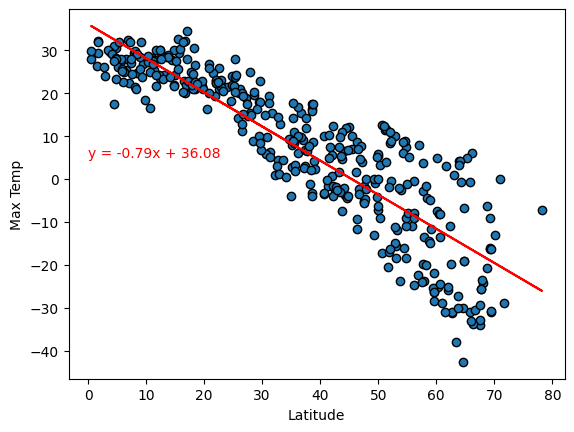

In [15]:
# Linear regression on Northern Hemisphere
x_reg = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_reg = pd.to_numeric(northern_hemi_df["Max Temp"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg, y_reg)
r_values = (x_reg * slope) + intercept
eol = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_reg, y_reg, edgecolor = "black")
plt.plot(x_reg, r_values, color ="r")
plt.annotate(eol, xy=(0,5), color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("output_data/Fig5.png")
plt.show()

The r-value is: 0.6315874400748904


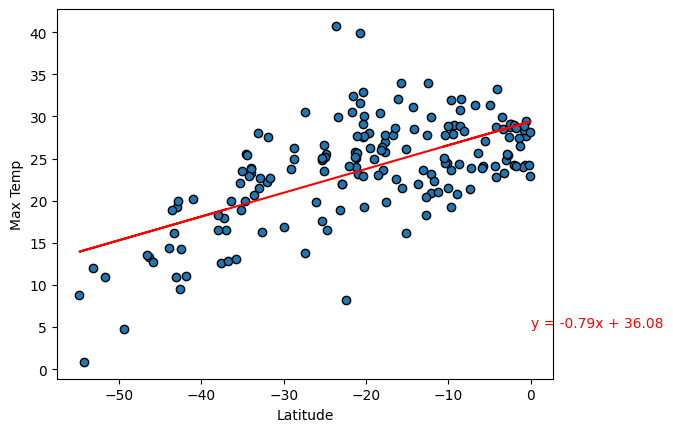

In [16]:
# Linear regression on Northern Hemisphere
x_reg2 = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_reg2 = pd.to_numeric(southern_hemi_df["Max Temp"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg2, y_reg2)
r_values = (x_reg2 * slope) + intercept

print(f"The r-value is: {rvalue}")
plt.scatter(x_reg2, y_reg2, edgecolor = "black")
plt.plot(x_reg2, r_values, color ="r")
plt.annotate(eol, xy=(0,5), color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("output_data/Fig5.png")
plt.show()

**Discussion about the linear relationship:** Inverse 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.48132939890983784


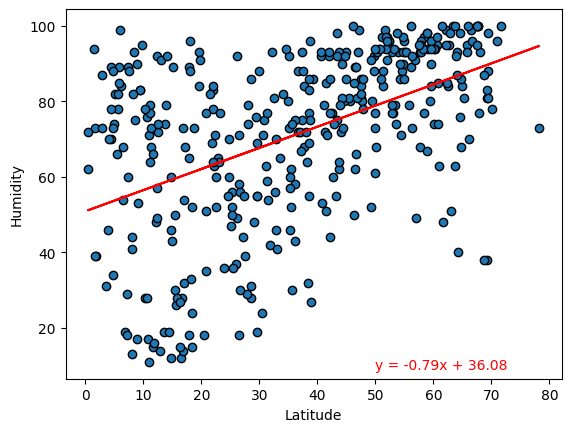

In [17]:
# Northern Hemisphere
y_reg = pd.to_numeric(northern_hemi_df["Humidity"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg, y_reg)
r_values = (x_reg * slope) + intercept
print(f"The r-value is: {rvalue}")
plt.scatter(x_reg, y_reg, edgecolor = "black")
plt.plot(x_reg, r_values, color ="r")
plt.annotate(eol, xy=(50,9), color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/Fig6.png")
plt.show()

The r-value is: 0.05913970245452194


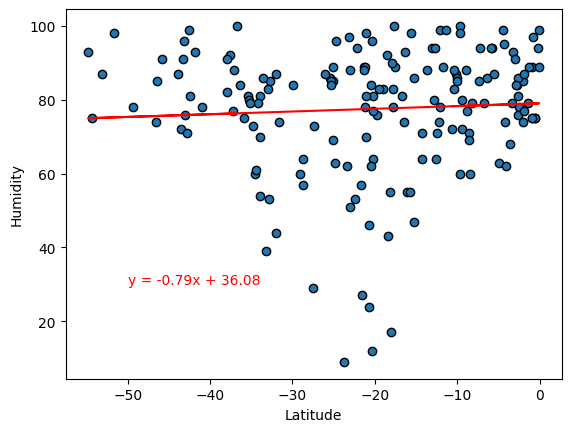

In [18]:
# Southern Hemisphere
y_reg2 = pd.to_numeric(southern_hemi_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg2, y_reg2)
r_values = (x_reg2 * slope) + intercept
print(f"The r-value is: {rvalue}")
plt.scatter(x_reg2, y_reg2, edgecolor = "black")
plt.plot(x_reg2, r_values, color ="r")
plt.annotate(eol, xy=(-50,30), color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/Fig7.png")
plt.show()

**Discussion about the linear relationship:** Strong relationship in Northern hemisphere, very weak in southern

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23596721600754186


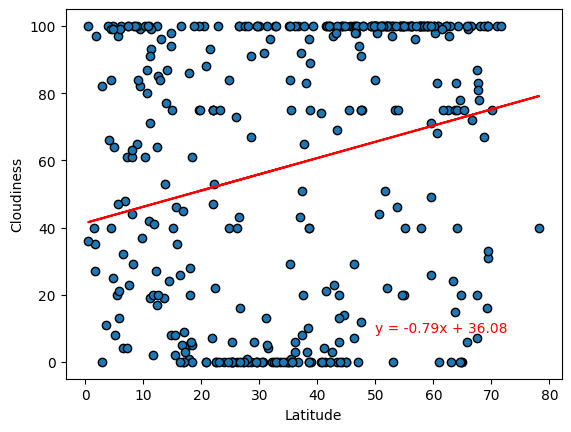

In [19]:
# Northern Hemisphere
y_reg = pd.to_numeric(northern_hemi_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg, y_reg)
r_values = (x_reg * slope) + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg, y_reg)
print(f"The r-value is: {rvalue}")
plt.scatter(x_reg, y_reg, edgecolor = "black")
plt.plot(x_reg, r_values, color ="r")
plt.annotate(eol, xy=(50,9), color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/Fig8.png")
plt.show()

The r-value is: 0.1750135064482301


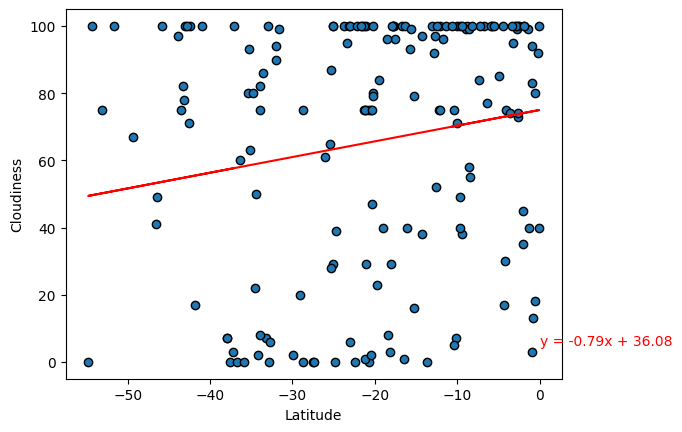

In [20]:
# Southern Hemisphere
y_reg2 = pd.to_numeric(southern_hemi_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg2, y_reg2)
r_values = (x_reg2 * slope) + intercept
print(f"The r-value is: {rvalue}")
plt.scatter(x_reg2, y_reg2, edgecolor = "black")
plt.plot(x_reg2, r_values, color ="r")
plt.annotate(eol, xy=(0,5), color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/Fig9.png")
plt.show()

**Discussion about the linear relationship:** Weak linear relationship in both hemispheres

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02944692581560472


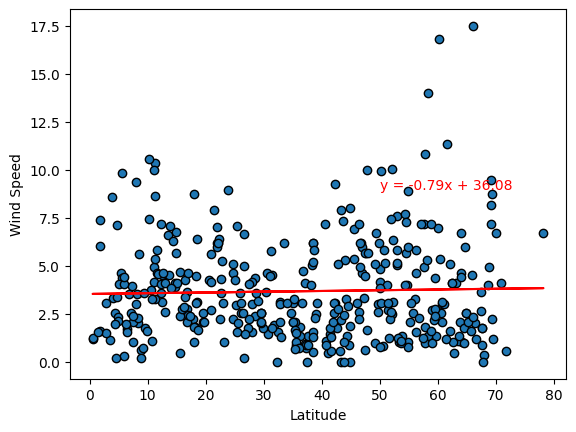

In [21]:
# Northern Hemisphere
y_reg = pd.to_numeric(northern_hemi_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg, y_reg)
r_values = (x_reg * slope) + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg, y_reg)
print(f"The r-value is: {rvalue}")
plt.scatter(x_reg, y_reg, edgecolor = "black")
plt.plot(x_reg, r_values, color ="r")
plt.annotate(eol, xy=(50,9), color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/Fig10.png")
plt.show()

The r-value is: -0.24825485462416813


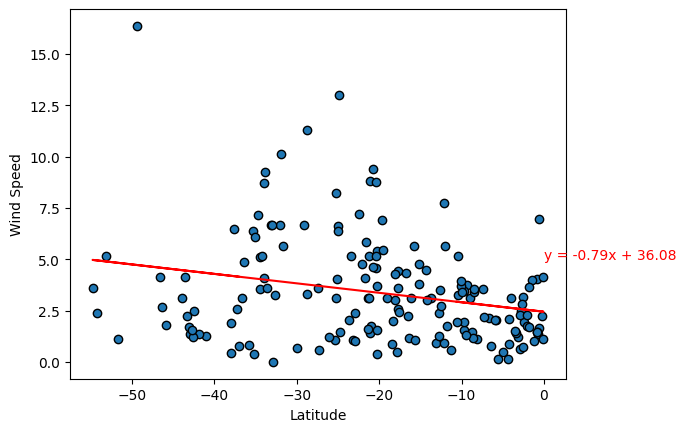

In [22]:
# Southern Hemisphere
y_reg2 = pd.to_numeric(southern_hemi_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg2, y_reg2)
r_values = (x_reg2 * slope) + intercept
print(f"The r-value is: {rvalue}")
plt.scatter(x_reg2, y_reg2, edgecolor = "black")
plt.plot(x_reg2, r_values, color ="r")
plt.annotate(eol, xy=(0,5), color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/Fig11.png")
plt.show()

**Discussion about the linear relationship:** No relationship at all